In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm

In [36]:
#parametros 
v0 = 1
nu = 0.2
N = 51
h = 0.02
omega = 0.9
R = v0*h/nu

#lims
xmax = 25
xmin = 5
ymax = 30
ymin = 5




In [37]:
x = np.linspace(0., 1., N)
y = np.linspace(0., 1., N)


In [38]:
u = np.zeros((N, N))
w = np.zeros((N, N))


In [39]:
def LimitesCurrent():
    
    for i in range(len(y)):
        #right 
        u[-1,i] = u[-2,i]
        #left
        u[1,i] = u[0,i]
        #top
        u[i,-1] = u[i,-2] + v0*h*y[-1]
        #bottom
        u[i,0] = 0


def LimitesVorticity():
    
    for i in range(len(y)):
        #right 
        w[-1,i] = w[-2,i]
        #left
        w[0,i] = 0
        #top
        w[i,-1] = 0
        #bottom
        w[i,0] = 0
        

def LimitesObjetoCurrent():
    
    for i in range(xmin , xmax + 1):
        for j in range(ymin, ymax + 1):
            #right 
            u[xmax,j] = 0
            #left
            u[xmin,j] = 0
            #top
            u[i,ymax] = 0
            #bottom
            u[i,ymin] = 0
  

In [40]:
def LimitesObjetoVorticity():
    
    for i in range(xmin, xmax + 1):
        #top
        w[i,ymax] = (-2/(h**2)) * (u[i,ymax-1]-u[i,ymax])
        #bottom
        w[i,ymin] = (-2/(h**2)) * (u[i,ymin+1]-u[i,ymin])
    for i in range(ymin,ymax+1):
        #left
        w[xmin,i] = (-2/(h**2)) * (u[xmin+1,i]-u[xmin,i])
        #right
        w[xmax,i] = (-2/(h**2)) * (u[xmax-1,i]-u[xmin,i])
   
        


In [41]:
def GetRelaxation():
    
    for it in tqdm(range(100)):
        
        #corro mis fun
        LimitesCurrent()
        LimitesVorticity()
        LimitesObjetoCurrent()
        LimitesObjetoVorticity()

        for i in range(1,len(x)-1):
            for j in range(1,len(y)-1):
                
                if ( i<(xmax-1) and i>(xmin+1) and j<(ymax-1) and i>(xmin+1)):
                    u[i,j]=0
                    w[i,j]=0
                
                else:
                    suma = u[i+1,j] + u[i-1,j] + u[i,j+1] + u[i,j-1] + ((h**2*w[i,j]))
                    relaxationU = 1/4 * suma
                    rU = omega*(relaxationU - u[i,j])
                    u[i,j] += rU
                    
                    sumaw = w[i+1,j] + w[i-1,j] + w[i,j+1] + w[i,j-1] \
                                           - (0.0625*R)*(((u[i,j+1] - u[i,j-1])*(w[i+1,j]- w[i-1,j])) \
                                                         - ((u[i+1,j] - u[i-1,j])*(w[i,j+1] - w[i,j-1])))
                    relaxationW = 1/4 * sumaw
                    rW = omega*(relaxationW - w[i,j])
                    w[i, j] += rW
                            
            

In [42]:
GetRelaxation()

100%|██████████| 100/100 [00:01<00:00, 62.08it/s]


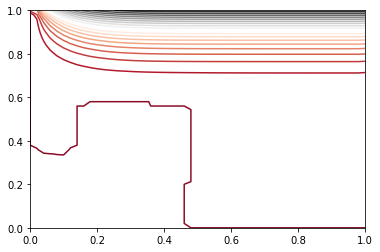

In [49]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ejex,ejey = np.meshgrid(x,y)
corriente = ax1.contour(ejex,ejey, u.T, 20, cmap = "RdGy")

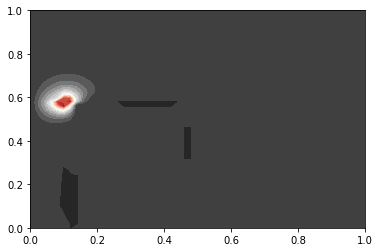

In [48]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(1,1,1)
vorti = ax2.contourf(ejex,ejey, w.T, 20, cmap = "RdGy")


In [45]:
vx = np.zeros((N, N))
vy = np.zeros((N, N))

for i in range(1, len(x) - 1):
    for j in range(1, len(y) - 1):
        vx[i,j] = (u.T[i+1,j] - u.T[i-1,j])/(2*h)
        vy[i,j] = -(u.T[i,j+1] - u.T[i,j-1])/(2*h)

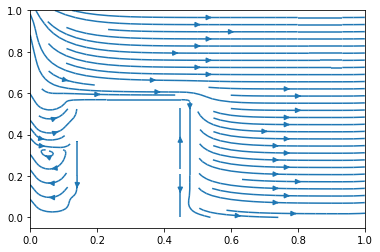

In [47]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(1,1,1)

stream = plt.streamplot(ejex, ejey, vx, vy, density = 1.0)